### 1 Contigous

- 307. Range Sum Query - Mutable
- 308. Range Sum Query 2D - Mutable

video: https://www.youtube.com/watch?v=uSFzHCZ4E-8

In [9]:
# import
from collections import Counter
from math import gcd, floor, ceil
from copy import copy, deepcopy
from string import ascii_lowercase, ascii_uppercase
from math import inf
import string, bisect, heapq 
from itertools import permutations
from math import factorial
from bisect import *

In [10]:
class BIT:
    def __init__(self, nums): # init from index 1 to n
        self.tree = [0] + nums
        self.n = len(self.tree)
        for i in range(1, self.n):
            p = i + self.lowbit(i)
            # print(p, i)
            if p < self.n:
                self.tree[p] += self.tree[i]

    def lowbit(self, i): # get low bit
        return i & -i

    def add(self, i, k): # add k to index i
        while i < self.n:
            self.tree[i] += k
            i += self.lowbit(i)

    def update(self, i, k): # update index i to k
        cur_val = self.query(i, i)
        val = k - cur_val
        self.add(i + 1, val)

    def sum(self, i): # sum of index 1 to n 
        res = 0
        while i > 0:
            res += self.tree[i]
            i -= self.lowbit(i)
        return res
    def query(self, l, r): # query from l to r inclusive
        return self.sum(r + 1) - self.sum(l)

In [8]:
class NumArray:

    def __init__(self, nums):
        self.tree = BIT(nums)

    def update(self, index: int, val: int) -> None:
        self.tree.update(index, val)

    def sumRange(self, left: int, right: int) -> int:
        return self.tree.query(left, right)


# Your NumArray object will be instantiated and called as such:
obj = NumArray([1, 2, 3, 4])
obj.update(0, 2)
param_2 = obj.sumRange(0, 3)
param_2

11

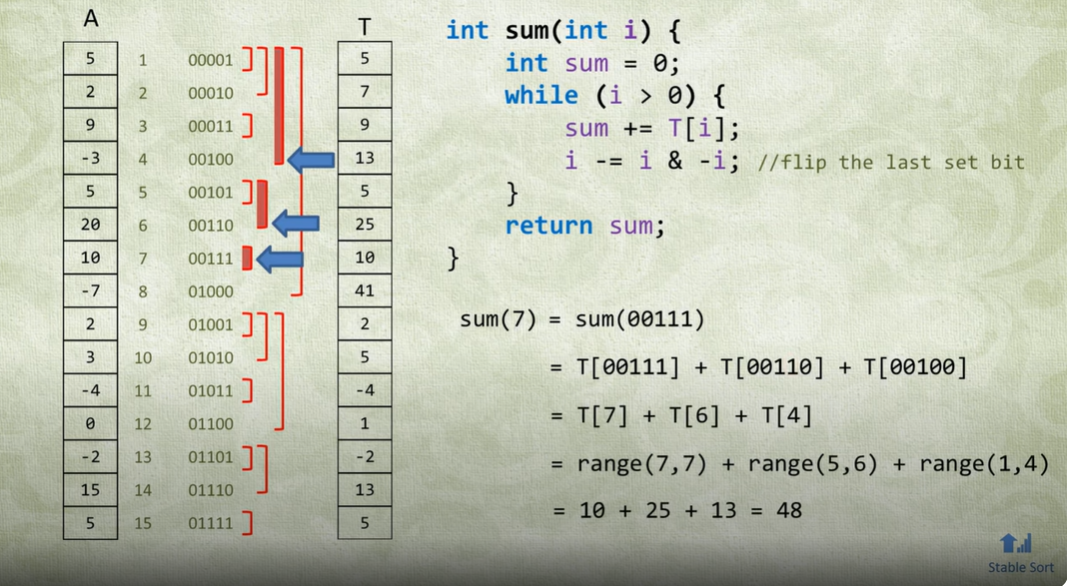

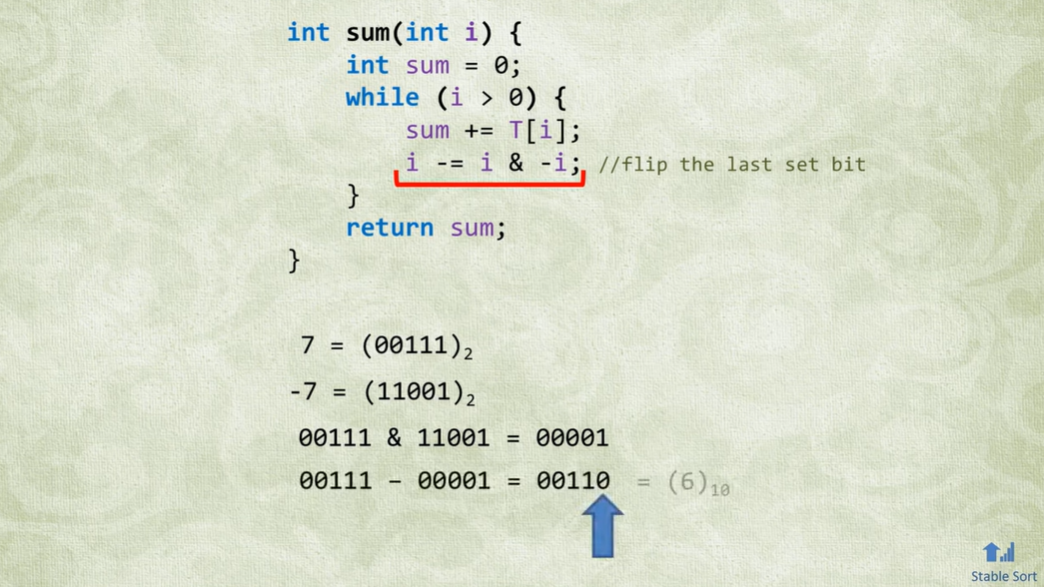

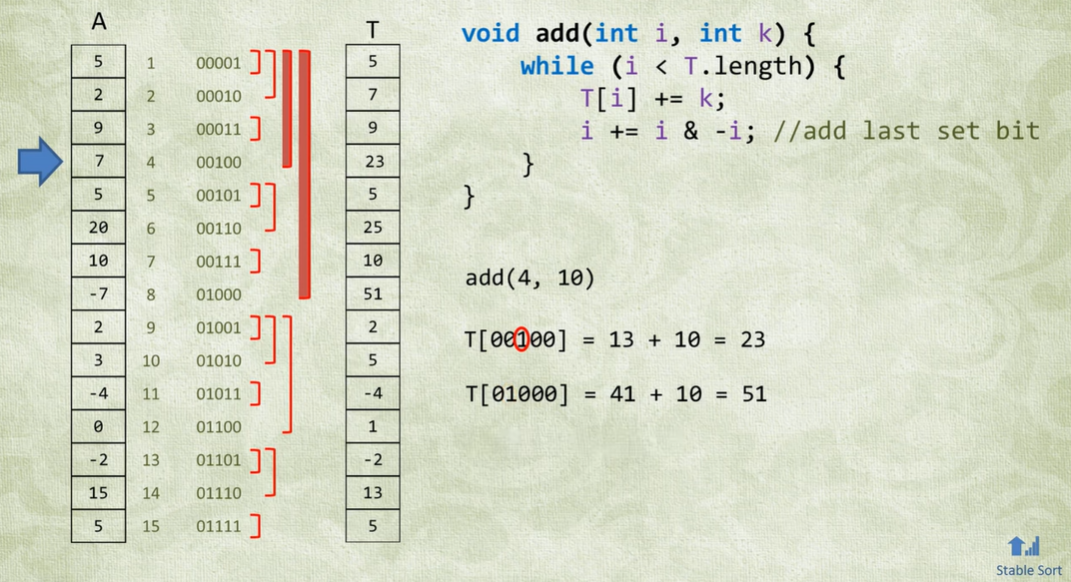

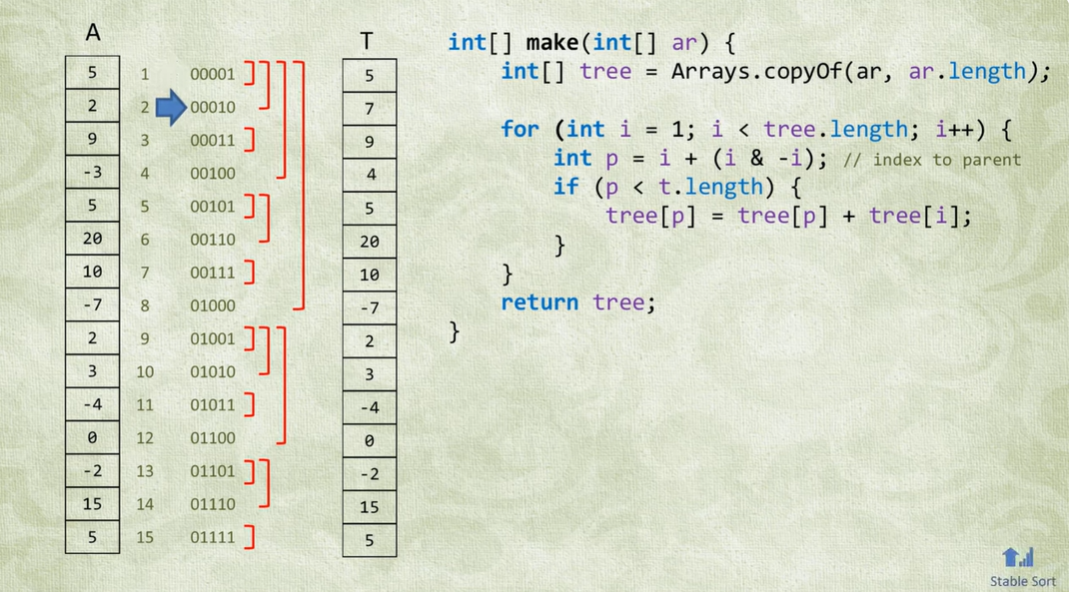

### 2 Discrete 

- 3072. Distribute Elements Into Two Arrays II

In [1]:
class BIT:
    __slots__ = 'tree', 'n'
    def __init__(self, n): # init from index 1 to n
        self.tree = [0] * n
        self.n = len(self.tree)

    def lowbit(self, i): # get low bit
        return i & -i

    def add(self, i, k): # add k to index i
        while i < self.n:
            self.tree[i] += k
            i += self.lowbit(i)

    # def update(self, i, k): # update index i to k
    #     cur_val = self.query(i, i)
    #     val = k - cur_val
    #     self.add(i + 1, val)

    def sum(self, i): # sum of index 1 to n
        res = 0
        while i > 0:
            res += self.tree[i]
            i -= self.lowbit(i)
        return res

    # def query(self, l, r): # query from l to r inclusive
    #     return self.sum(r + 1) - self.sum(l)

class Solution:
    def resultArray(self, nums: List[int]) -> List[int]:
        sorted_nums = sorted(set(nums))
        n = len(sorted_nums)
        a, b = [nums[0]], [nums[1]]
        t1, t2 = BIT(n + 1), BIT(n + 1)
        t1.add(bisect_left(sorted_nums, nums[0]) + 1, 1)
        t2.add(bisect_left(sorted_nums, nums[1]) + 1, 1)
        for x in nums[2:]:
            i = bisect_left(sorted_nums, x) + 1
            gc1 = len(a) - t1.sum(i)
            gc2 = len(b) - t2.sum(i)
            if gc1 > gc2 or gc1 == gc2 and len(a) <= len(b):
                a.append(x)
                t1.add(i, 1)
            else:
                b.append(x)
                t2.add(i, 1)
        return a + b 

NameError: name 'List' is not defined